# SKLEARN PIEPLINES
---
Materials prepared, or collected and modified by:    
__Pawel Rosikiewicz__, www.SimpleAI.ch   

## CONTENT
* My Infopages 
* Code examples

## SOURCE MATERIALS
links to source materials, and additional readings, were added to text or code in each section directly.

![outliers_slide_01](images/Sklearn_pipeline_01.png)

![outliers_slide_01](images/Sklearn_pipeline_02.png)

## CODE EXAMPLES:
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn import neighbors, preprocessing  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score  

from sklearn.datasets import make_classification # creates simple data egxample

#### import my helper functions

In [2]:
from src.utils.ml_model_metrics import plot_confusion_matrix # creates annotated heatmap for confusion matrix

### Step 1. create example data

In [3]:
X, y = make_classification(
    n_samples=1000, 
    n_features=20, 
    n_informative=10, 
    n_redundant=2, 
    n_repeated=0, 
    n_classes=4, 
    n_clusters_per_class=2
)

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

# are classes balanced
print("target:\n",pd.Series(y).value_counts())

X shape: (1000, 20)
y shape: (1000,)
target:
 3    251
0    250
2    250
1    249
dtype: int64


### create simple classyficaiton model

In [4]:
# split to train/test
X_tr, X_te, y_tr, y_te = train_test_split(
        X, y, train_size=0.7, random_state=0) 

# scale input data
scaler = preprocessing.StandardScaler().fit(X_tr)  
X_tr = scaler.transform(X_tr)  
X_te = scaler.transform(X_te)  

# Create classifier & train it
clf = neighbors.KNeighborsClassifier(n_neighbors=2)
clf.fit(X_tr, y_tr)  

# predict test values and check summary
y_pred = clf.predict(X_te)

train_acc: 0.8128571428571428
test_acc: 0.5833333333333334


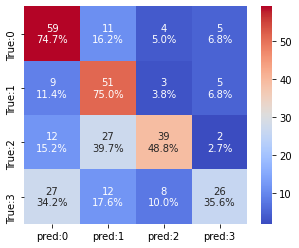

In [6]:
# Function, ..............................
def show_results(model, y_tr, y_te):
    'helper funtion to examine classyficaiotn results'
    print(f'train_acc: {accuracy_score(y_tr, model.predict(X_tr))}')
    print(f'test_acc: {accuracy_score(y_te, model.predict(X_te))}')
    plot_confusion_matrix(X_te, y_te, model, 
                          with_perc=True, cmap="coolwarm", figsize=(5,4))

# create confusion matrix, with % of predicted classes in each row
show_results(clf, y_tr, y_te)

### Use Pipeline Function to find best k-value
__Pipeline function__ is used to encapsulate multiple steps with pipeline
https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

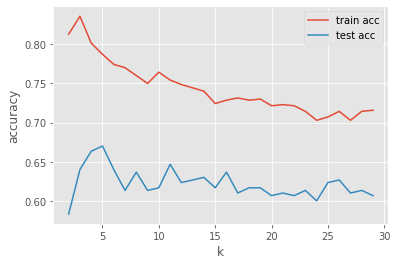

In [7]:
from sklearn.pipeline import Pipeline

# each step requires a name, and a function
pipe = Pipeline([
 	   ('scaler', preprocessing.StandardScaler()),
	   ('knn',neighbors.KNeighborsClassifier(n_neighbors=5))
	])

# test different k values
results = []
for k in list(range(2,30)):
    # set k in the pipeline
    pipe.set_params(knn__n_neighbors=k)
    pipe.fit(X_tr, y_tr)
    
    # collect the results
    results.append({
        'k':k,
        'train_acc': accuracy_score(y_tr, pipe.predict(X_tr)),
        'test_acc': accuracy_score(y_te, pipe.predict(X_te))
    })
    
# convert the results to pd.dataframe & plot them
gs = pd.DataFrame(results)

# plot results
plt.style.use("ggplot")
plt.plot(gs.loc[:,'k'], gs.loc[:,'train_acc'], label="train acc")
plt.plot(gs.loc[:,'k'], gs.loc[:,'test_acc'], label="test acc")
plt.xlabel("k")
plt.ylabel("accuracy")
plt.legend()   
plt.show()

retrain model with bext k-value and plot the results with test data

train_acc: 0.8128571428571428
test_acc: 0.5833333333333334


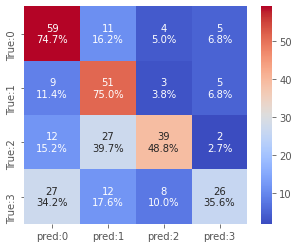

In [8]:
# find best k, and show confusion matrix
best_k = gs.sort_values(by="test_acc", ascending=False).k.iloc[0]

# retrain the model with bst_k
pipe.set_params(knn__n_neighbors=best_k)
pipe.fit(X_tr, y_tr)

# create confusion matrix, with % of predicted classes in each row
show_results(clf, y_tr, y_te)

#### check parameters in pipeline

In [9]:
# to see parameters at each step
pipe.get_params() 
    # returns: {'memory': None,
    #.           'steps': [( ...

# basic text info
pipe.named_steps
    # returns:  {'scaler': StandardScaler(), 'knn': KNeighborsClassifier()}

# visualize the pipeline
from sklearn import set_config
set_config(display="diagram"); pipe
# beatiful visualizations (HTML)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

#### disable the step, remove, etc..

train_acc: 0.7871428571428571
test_acc: 0.67


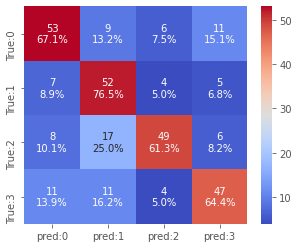

In [10]:
# retrain the model with bst_k
pipe.set_params(scaler=None)
pipe.fit(X_tr, y_tr)

# create confusion matrix, with % of predicted classes in each row
show_results(pipe, y_tr, y_te)

In [11]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', None), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': None,
 'knn': KNeighborsClassifier(),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

### Use ParameterGrid to search fro optimal comabination of Hyperparameters
---

In [50]:
from sklearn.model_selection import ParameterGrid

# create a basic grid and tun it.
''' important, 
    if you use None, or eg standardscaller, 
    the object must be provided in the list
'''
grid = ParameterGrid({
    'scaler':[None, preprocessing.StandardScaler()], 
    'knn__n_neighbors': list(range(2,8))
})

# you may also create unique comabinations, 
# ...ie groups of hyperparameters that are not mixed with each other 
'''each group must be in separate dct'''
grid = (
    {'scaler':[None], # even one param must be in a list
    'knn__n_neighbors': list(range(2,4))
    },
    {'scaler':[preprocessing.StandardScaler()], 
    'knn__n_neighbors': list(range(5,6))
    } 
)
list(ParameterGrid(grid))

[{'knn__n_neighbors': 2, 'scaler': None},
 {'knn__n_neighbors': 3, 'scaler': None},
 {'knn__n_neighbors': 5, 'scaler': StandardScaler()}]

we can access all elements in a parameter grid as in the list,
here is example, of simple funciton that I am using to store the results

In [40]:
def my_grid_search(pipe, grid):
    # test different k values
    results = []
    for params in grid:
        # set k in the pipeline
        pipe.set_params(**params)
        pipe.fit(X_tr, y_tr)

        # collect the results
        results.append({
            **params,
            'train_acc': accuracy_score(y_tr, pipe.predict(X_tr)),
            'test_acc': accuracy_score(y_te, pipe.predict(X_te))
        })

    # convert the results to pd.dataframe & list top 5
    gs = pd.DataFrame(results)
    print(gs.sort_values(by='test_acc', ascending=False).head())

Finally run it on an example:

In [51]:
# create sklearn pipeline with the classifier
pipe = Pipeline([
 	   ('scaler', None), # you must add that step, otherwise it may be a problem, 
	   ('knn',neighbors.KNeighborsClassifier(n_neighbors=5))
	])

# define parameter grid
grid = ParameterGrid({
    'scaler':[None, preprocessing.StandardScaler()], 
    'knn__n_neighbors': list(range(2,8))
})

# find best hyperparameters
my_grid_search(pipe, grid)

   knn__n_neighbors            scaler  train_acc  test_acc
6                 5              None   0.787143  0.670000
7                 5  StandardScaler()   0.787143  0.670000
4                 4              None   0.801429  0.663333
5                 4  StandardScaler()   0.801429  0.663333
2                 3              None   0.835714  0.640000


### make_pipeline vs pipeline functions & applying custom transformers
* make_pipeline
    * creates the same type of objects as Pipleine() functio
    * gives names for each step automatically, 
    * very usefull for preprocessing functions,
    * I use it, often to create smaller pipelines for data transfomers, 
        * eg I create a transfomer and later provide it into the final pipeline created with Pipeline() function



![outliers_slide_01](images/Sklearn_Pipeline_03.jpeg)

#### example

In [111]:
from sklearn.preprocessing import FunctionTransformer # creates custom transfomers
from sklearn.pipeline import make_pipeline # like pipeline function, but give step names automatically, 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, KBinsDiscretizer # skleanr transformers,
from sklearn.compose import ColumnTransformer # allows using different transformers to different columns


# create custom transformer
log_scale_transformer = make_pipeline( 
    FunctionTransformer(np.abs, validate=False), # see below   
    FunctionTransformer(np.log1p, validate=False), # creates runtime warning if negative data are used
    StandardScaler()
)

# use ColumnTransformer to create data preprocessor 
'''we can aplly different tranfomers to different columns
    - give unique names for each transformer
    - passthrough - keyword, nothing is done with that column
    - column names are always provided as LIST
'''
data_preprocessor = ColumnTransformer(
    transformers=[
        ("passthrough_numeric", "passthrough", list(range(1,10))),
        ("log_scaled_numeric", log_scale_transformer, [0]),
        ("binned_numeric", KBinsDiscretizer(n_bins=10, encode="ordinal"), [11, 12]), # is encode="onehot", all bins are in different columns, Caution, it does not drop 1 column 1
    ],
    remainder="drop",      # what to do with other columns? TWO OPTION {‘drop’, ‘passthrough’}, if drop, these are removed.
)

transformed_data = data_preprocessor.fit_transform(X_tr)
transformed_data.shape

(700, 12)

#### now lest try to run it,

In [112]:
# create sklearn pipeline with the classifier
pipe = Pipeline([
 	   ('data_preprocessor', data_preprocessor), # you must add that step, otherwise it may be a problem, 
	   ('knn',neighbors.KNeighborsClassifier(n_neighbors=5))
	])

pipe.fit(X_tr, y_tr)

# visualize the pipeline
from sklearn import set_config
set_config(display="diagram"); pipe

Pipeline(steps=[('data_preprocessor',
                 ColumnTransformer(transformers=[('passthrough_numeric',
                                                  'passthrough',
                                                  [1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                                 ('log_scaled_numeric',
                                                  Pipeline(steps=[('functiontransformer-1',
                                                                   FunctionTransformer(func=<ufunc 'absolute'>)),
                                                                  ('functiontransformer-2',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  [0]),
                                                 ('binned_numeric',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=10),
                                                  [11, 12])])),
                ('knn', KNeighborsClassifier())])

In [113]:
# just to see how did i channged the accuracy

# define parameter grid
grid = ParameterGrid({
    'knn__n_neighbors': list(range(2,8))
})

# find best hyperparameters
my_grid_search(pipe, grid)

   knn__n_neighbors  train_acc  test_acc
4                 6   0.691429  0.540000
2                 4   0.721429  0.536667
3                 5   0.698571  0.533333
5                 7   0.690000  0.533333
1                 3   0.744286  0.500000


### cross-validation with Scikit-learn
---

__INTRODUCTION__
* Scikit-learn allows implementing several strategies for cross-validation https://scikit-learn.org/stable/modules/cross_validation.html
* Important:
    * it is important to not use test data to learn, on estimator, but also on scaling, feature selection etc...
    * skleanr funcitons such as Pipeline, make_pipeline, or crossvalidation help you with that
    
__KEY FUNCTIONS__    
* train_test_split
    * fast method t generate one test/train set split, 
    * with random shuffle of rowns in the df, 
    * not very usefull, for tuning hyperparameters (eg. alpha, and c), because data in train/test sets, may affect the results,
    

* __cross_validate__   
    - used in code examples below, 
    - allows specifying multiple metrics for evaluation.
    - allows using different Cross validation iterators
    - returns a dict containing 
        * fit-times, 
        * scores, for test data, 
        * optionally: training scores with fitted estimators
    - The multiple metrics can be specified either as a list, tuple or set of predefined scorer names; 
        > from sklearn.metrics import recall_score  
        > scoring = ['precision_macro', 'recall_macro']   
        > clf = svm.SVC(kernel='linear', C=1, random_state=0)   
        > scores = cross_validate(clf, X, y, scoring=scoring)   
        > sorted(scores.keys())   
        > ['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']   
        > scores['test_recall_macro']   
        > array([0.96..., 1.  ..., 0.96..., 0.96..., 1.        ])  
                         
                         
__CV Iteratoors__                                      
* __KFold__                
    - divides all the samples in k groups of samples, called folds   
    - if k=n, this is equivalent to the Leave One Out strategy   
    - The prediction function is learned using k-1 folds, and the fold left out is used for test.   
    > from sklearn.model_selection import KFold     
    > kfold = KFold(n_splits=3, shuffle=True, random_state=0)  
    
* __ShuffleSplit__      
    - creates, n different train/tests  sets, by shuffling the data,   
    - equalivalent to applying ntimes train_test_split()   
    - Samples are first shuffled and then split into a pair of train and test sets   
    - It is possible to control the randomness for reproducibility of the results by explicitly seeding the random_state pseudo random number   generator

__STRATIFIED CV__   
* __Stratified k-fold__   
    - default iterator in cross_validate function,    
    - type of k-fold which returns stratified folds:     
        * ie. each set contains approximately the same percentage of samples of each target class as the complete set.   
    - default iterator in cross_validate function,   
    > from sklearn.model_selection import StratifiedKFold   
    > skf = StratifiedKFold(n_splits=3)   
                                    
* __StratifiedShuffleSplit__ 
    -  type of ShuffleSplit, which returns stratified splits, 

__Other types__
* __RepeatedKFold__          
    - repeats K-Fold n times, producing different splits in each repetition
    > from sklearn.model_selection import RepeatedKFold    
    > random_state = 12883823
    > rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)

* __Leave One Out (LOO)__ 
    - Each learning set is created by taking all the samples except one
    - the test set being the sample left out, 
    - __Pros:__ do not waste much data, almostz all are uzsed for traning, 
    - __Cons:__ 
        * test rersults have high varinace in accuracy, 
        * models, constructed from almost all data are virtally identical,
        * As a general rule, most authors, and empirical evidence, suggest that 5- or 10- fold cross validation should be preferred to LOO.
    > from sklearn.model_selection import LeaveOneOut   
    > loo = LeaveOneOut()   

* __Leave P Out (LPO)__        
    - creates all the possible training/test sets by removing p samples from the complete set. 
    > from sklearn.model_selection import LeavePOut   
    > lpo = LeavePOut(p=2)     